<center>

# Основы глубинного обучения: домашнее задание 4
</center>

**ФИО:**

**Забавный факт о себе:**

## Общая информация

__Дата выдачи:__ 26.11.2024

__Мягкий дедлайн:__ 23:59MSK 10.12.2024

__Жесткий дедлайн:__ 23:59MSK 13.12.2024

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 бонусных балла.

**Дисклеймер:** Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). Также помните, что простое копирование чужого кода не является самостоятельной работой.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

In [ ]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

# Описание данных

Данные можно [скачать с гугл-диска.](https://drive.google.com/drive/folders/11oCcLplWtp_qm-WuEbfCFP_Mz5K_z3ps?usp=sharing) Если вы делаете задание в колабе, то строчки ниже сами скачают вам данные.



In [ ]:
# import gdown

# url = "https://drive.google.com/drive/folders/11oCcLplWtp_qm-WuEbfCFP_Mz5K_z3ps?usp=sharing"
# gdown.download_folder(url, quiet=True, use_cookies=False)

В таблице `ria_news.tsv`  лежат данные о новостях, вышедших на сайте РИА-НОВОСТИ с 15 марта 2018 года по 31 декабря 2018 года.

- `href` - уникальный идентификатор новости (ссылка на неё)
- `date` - дата публикации новости
- `time` - время публикации новости
- `title` - заголовок новости
- `snippet` - краткое описание новости
- `text` - текст новости
- `category` - категория новости
- `keywords` - ключевые слова (подкатегории новости)
- `shows` - счётчик с числом просмотров новости на сайте (на момент парсинга)

In [ ]:
df_ria = pd.read_csv('/kaggle/input/ogo-hw-4/news_data/ria_news.tsv', sep='\t')
df_ria = df_ria[~df_ria.tags.isnull()]
print(df_ria.shape)
df_ria.head()

(201708, 9)


,href,date,time,title,snippet,text,category,tags,shows
0,/20181231/1548961410.html,2018-12-31,"31 декабря 2018, 23:52",Нетаньяху не собирается в отставку в случае пр...,Премьер-министр Израиля Биньямин Нетаньяху не ...,"МОСКВА, 31 дек - РИА Новости. Премьер-министр ...",В мире,"Биньямин Нетаньяху, Израиль, В мире",728.0
1,/20181231/1548961364.html,2018-12-31,"31 декабря 2018, 23:19",Макрон в новогоднем обращении затронул тему ре...,"Результат реформ не может быть мгновенным, зая...","ПАРИЖ, 31 дек – РИА Новости. Результат реформ ...",В мире,"Эммануэль Макрон, Франция, В мире",3086.0
2,/20181231/1548961337.html,2018-12-31,"31 декабря 2018, 23:12",Аарон Рэмзи проведет переговоры с пятью топ-кл...,"Полузащитник лондонского ""Арсенала"" Аарон Рэмз...","МОСКВА, 31 дек - РИА Новости. Полузащитник лон...",NaN,ФК Арсенал (Лондон),183.0
3,/20181231/1548961304.html,2018-12-31,"31 декабря 2018, 23:09",Гол Азмуна принес сборной Ирана победу над кат...,Футболисты сборной Ирана одержали победу над к...,"МОСКВА, 31 дек - РИА Новости. Футболисты сборн...",NaN,"Сердар Азмун, Сборная Ирана по футболу",78.0
4,/20181231/1548961265.html,2018-12-31,"31 декабря 2018, 23:07",Пятая ракетка мира дель Потро пропустит Открыт...,Аргентинский теннисист Хуан Мартин дель Потро ...,"МОСКВА, 31 дек - РИА Новости. Аргентинский тен...",NaN,Теннис,79.0


Многие новостные агенства поддерживают странички в социальных сетях. Они постят туда самые сочные сюжеты. В таблице `vk_news.tsv` лежат данные о новостях, которые РИА запостили ВКонтакте в период времени с  `2017-09-29 01:28:55` по `2019-02-01 23:13:17`.

- `id` - уникальный идентификатор поста
- `href` - ссылка на сайт (если она была указана в посте)
- `datetime` - дата и время публикации новости
- `title` - заголовок новости
- `text` - текст новости в социальной сети
- `likes` - число лайков под постом
- `comments` - число комментариев под постом

In [ ]:
df_vk = pd.read_csv('/kaggle/input/ogo-hw-4/news_data/vk_news.tsv', sep='\t')
df_vk['snippet'] = df_vk['text']
df_vk.drop('text', axis=1, inplace=True)
print(df_vk.shape)
df_vk.head()

(19928, 7)


,id,href,datetime,title,likes,comments,snippet
0,24006362,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причас...",15,28,NaN
1,24006240,/20190201/1550268781.html,2019-02-01 22:38:41,"Житель Урала ""заминировал"" ТЦ из-за снятия со...",32,42,NaN
2,24006100,/20190201/1550282212.html,2019-02-01 21:58:52,"В Черном море нашли ""потерянный флот Гитлера""",84,23,NaN
3,24005972,/20190202/1550283179.html,2019-02-01 21:27:06,В США освободили задержанную российскую актрис...,58,35,NaN
4,24005764,/20190201/1550262848.html,2019-02-01 20:55:54,Толкнувший Скабееву депутат Рады заявил о гроз...,45,145,NaN


В таблице `vk_comments.tsv` лежат комментарии к новостям.

- `id` - уникальный идентификатор комментария
- `post_id` - идентификатор новости, под которой был оставлен комментарий
- `datetime` - дата и время, когда был оставлен комментарий
- `text` - текст комментария
- `likes` - число лайков под комментарием

In [ ]:
df_comments = pd.read_csv('/kaggle/input/ogo-hw-4/news_data/vk_comments.tsv', sep='\t')
df_comments = df_comments[~df_comments.text.isnull()]
print(df_comments.shape)
df_comments.head()

/tmp/ipykernel_124/2795629421.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_comments = pd.read_csv('/kaggle/input/ogo-hw-4/news_data/vk_comments.tsv', sep='\t')


(2612629, 5)


,id,post_id,datetime,text,likes
0,24006366.0,24006362.0,2019-02-01 23:14:14,ЧВК Вагнера?,5.0
1,24006370.0,24006362.0,2019-02-01 23:15:23,"[id4710641|Евгений], выздоравливай.",3.0
2,24006371.0,24006362.0,2019-02-01 23:16:21,"[id442655034|Андрей], искренне желаю этого все...",4.0
3,24006374.0,24006362.0,2019-02-01 23:16:38,Опять про Украину новости?,1.0
4,24006375.0,24006362.0,2019-02-01 23:16:40,Че такое ДНР?,2.0


# А что надо сделать то?

В тетрадке вам предстоит сделать следующие шаги:

1. Обучить нейросеть предсказывать категорию новости
2. Построить предсказания для тех новостей, где мы ничего не знаем о категории
3. Использовать уже обученный для сентимент-анализа классификатор из библиотеки `hugging face` чтобы предсказать эмоциональную окраску каждого комментария
4. Провести аналитику по новостям, а именно построите топы из самых позитивных и негативных категорий и новостей

Для первого шага вам будет дан бэйзлайн. Если вы его прогоните, у вас получится базовая модель, которая даст некоторое качество решения задачи. Вам надо будет выяснить, насколько это качество оказалось хорошим, а затем внести в код некоторые улучшения.



## Часть 1: категоризация новостей (5 баллов + 1.8 бонусных)

Каждой новости в соотвествие поставлены ключевые слова. Будем считать, что эти ключевые слова — тематики новости. Нужно научиться предсказывать тематики по тексту новости. Готовые тематики у нас есть только по новостям с сайта. Они за 2018 год. По новостям из ВКонтакте у нас тематик нет. Мы собираемся их предсказать.

Новости, опубликованные ВКонтакте, отличаются от новостей с сайта тем, что у них есть только титул и короткое описание. Странно будет обучать нейросеть на длинных текстах, а потом использовать её на коротких описаниях. Мы не будем так делать. Мы попробуем обучить базовый вариант нейронной сети только на заголовках новостей. Все, кто захочет получить бонусные баллы, смогут попробовать добавить в нейросеть сниппеты (так назыают короткие описания новостей).

## 1.1 Подготовка таргета

Поработаем с таргетом. Мы будем предсказывать переменную `tags`. Давайте выясним скоько уникальных тегов существует.

In [ ]:
from collections import Counter

# удалим все лишние пробелы и сделаем lowercase
df_ria['tags'] = (
    df_ria.tags.
    apply(lambda w: ','.join([item.strip() for item in  w.lower().split(',')]))
)

tags = ','.join(list(df_ria.tags.values))
tags_cnt = Counter(tags.split(','))

print(len(tags_cnt))
tags_cnt.most_common()[-20:]

13344


[('блог анны завершинской об автоспорте - блоги', 1),
 ('министерство транспорта рб', 1),
 ('министерство здравоохранения грузии', 1),
 ('палех', 1),
 ('юрий посохов (хореограф)', 1),
 ('мария александрова', 1),
 ('том бенсон', 1),
 ('абдул каюм кочай', 1),
 ('нуман куртулмуш', 1),
 ('mipim', 1),
 ('владимир попов', 1),
 ('брюно женезио', 1),
 ('роберт фицо', 1),
 ('сергей пашинский', 1),
 ('валерия гонтарева', 1),
 ('нововоронеж', 1),
 ('императорское православное палестинское общество', 1),
 ('event_poslanie_prezidenta_rf_federalnomu_sobraniju', 1),
 ('фхтр', 1),
 ('игорь честин', 1)]

Всего в выборке есть порядка 13 000 тэгов. Многие встречаются всего по разу. Давайте оставим в выборке только те тэги, которые встречаются более 30 раз.

In [ ]:
target_tags = {tag for tag,cnt in tags_cnt.most_common() if cnt > 30}
len(target_tags)

1583

Закодируем теги для OHE.

In [ ]:
tag2idx = dict(zip(target_tags, range(len(target_tags))))
idx2tag = {jtem: item for item,jtem in tag2idx.items()}

Почистим таргет от лишних тэгов.

In [ ]:
df_ria['target_tags'] = (
    df_ria.tags.
    apply(lambda w: [tag2idx.get(item) for item in  w.split(',') if item in target_tags])
)

df_ria = df_ria[df_ria.target_tags.apply(len) > 0]
df_ria.shape

(201437, 10)

In [ ]:
df_ria.target_tags.values[:3]

array([list([816, 707, 1349]), list([590, 654, 1349]), list([987])],
      dtype=object)

## 1.2 Подготовка текстов

Теперь займёмся предобработкой текстов. Приведём все слова к нижнему регистру и выбросим мусорные символы. В качестве токенов будем рассматривать отдельные слова.

Напомню, что мы пока что решили работать только с названиями статей. Поэтому вся предобработка применяется исключительно к ним. **Спойлер:** предобработку для сниппетов вы сделаете сами в первом же задании.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
from nltk.tokenize import word_tokenize

def normalise_text(text):
    text = text.lower()

    # сурово регулярками выкидываем мусорные символы
    text = re.sub('[^а-яa-z0-9 ]', '', text)
    return text.strip()

df_ria['title_clean'] = df_ria.title.apply(normalise_text)

word_cnt = Counter(word_tokenize(' '.join(df_ria.title_clean.values)))
len(word_cnt)

112178

In [ ]:
word_cnt.most_common()[:10]

[('в', 127323),
 ('на', 44386),
 ('с', 26150),
 ('и', 21771),
 ('о', 19948),
 ('по', 17014),
 ('россии', 13494),
 ('не', 13483),
 ('сша', 9942),
 ('за', 9881)]

Давайте почистим словарь от стоп-слов и подготовим его к использованию внутри датасета. Мы будем с помощью словаря заменять слова на индексы. Добавим в словарь несколько специальных токенов для неизвестных слов и паддингов.

In [ ]:
from nltk.corpus import stopwords

stops_ru = set(stopwords.words('russian'))
len(stops_ru)

151

In [ ]:
vocabulary = {
    "#PAD#": 0, "#UNK#": 1
}

k = 2
for word, _ in word_cnt.most_common():
    if word not in stops_ru:
        vocabulary[word] = k
        k += 1

In [ ]:
len(vocabulary)

112030

Завернём код для создания словаря в функцию.

In [ ]:
def create_vocab(text, stops_ru=stops_ru):

    word_cnt = Counter(word_tokenize(text))
    vocabulary = {
        "#PAD#": 0, "#UNK#": 1
    }

    k = 2
    for word, _ in word_cnt.most_common():
        if word not in stops_ru:
            vocabulary[word] = k
            k += 1
    return vocabulary

__[0.5 балла] Задание 1:__

- Cделайте аналогичную предобработку титулов из таблички `df_vk`. Запишите получившийся результат в столбец `title_clean` по аналогии с таблицей `df_ria`.
- Сделайте для обеих таблиц предобработку колонок со сниппетами `snippet` и запишите получившийся результат в столбец `snippet_clean`. Все пропуски заполните токеном `"#UNKN"`.

In [ ]:
df_vk['title_clean'] = df_vk.title.apply(normalise_text)
txt = ' '.join(df_vk.title_clean.values)

vocab_vk = create_vocab(txt)

In [ ]:
def normalise_snippnet(text):
    if type(text) == float:
        return "#UNKN"
    else:
        text = text.lower()

        # сурово регулярками выкидываем мусорные символы
        text = re.sub('[^а-яa-z0-9 ]', '', text)
        return text.strip()

df_ria['snippet_clean'] = df_ria.snippet.apply(normalise_snippnet)
df_vk['snippet_clean'] = df_vk.snippet.apply(normalise_snippnet)

## 1.3 Поставка данных

Пересечение сайта и ВК по опубликованным новостям довольно маленькое. Мы обучаем модель на данных с сайта. Предсказания мы будем строить на данных из ВК. У этих данных разная природа. В ВК описание статей и заголовки короче. Модель может хорошо показать себя на данных с новостного сайта, но сильно просесть в качестве на данных из ВК.

Давайте сохраним пересечение в отдельную табличку, чтобы на нём можно было понять, насколько сильно деградирует модель.

In [ ]:
ria_hrefs = set(df_ria.href.values)
vk_hrefs = set(df_vk.href.values)
test_hrefs = (vk_hrefs & ria_hrefs)

print('Размер отложенной выборки:', len(test_hrefs))

df = df_ria[~df_ria.href.isin(test_hrefs)]

Размер отложенной выборки: 1128


По странному совпадению (я правда не знаю почему) пересечение лежит в декабре. Мы будем его использовать как тестовую выборку.

In [ ]:
df_ria[df_ria.href.isin(test_hrefs)].date.min(), df_ria[df_ria.href.isin(test_hrefs)].date.max()

('2018-12-06', '2018-12-31')

Предположим, что мы делим выборку на обучающую и тестовую случайно. За один и тот же промежуток времени может выйти довольно большое число новостей с одинаковым заголовком. Давайте представим себе, что в тесте и трэйне есть много статей про одно и то же событие. Модель научилась на обучающей выборке хорошо его тегировать. Остальные события модель тегирует намного хуже. Метрики на тестовой выборке высокие. В следующем месяце СМИ перестают освещать это событие, в потоке новостей совершенно другие новости. Качество модели резко проседает.

Чтобы не напороться на завышенные метрики, обычно выборку дробят на обучающую и тестовую по времени. Тогда статьи из теста будут имитировать поток новых новостей, освещающих новые события.

In [ ]:
df.date.min(), df.date.max()

('2018-03-15', '2018-12-31')

__[0.5 балла] Задание 2:__ Разбейте выборку на обучающую, валидационную и тестовую. В тест возьмите весь декабрь. В валидацию октябрь и ноябрь.

In [ ]:
# your code here
# ♡ (´｡• ω •｡`)

df_test = df[(df.date >= '2018-12-01') & (df.date <= '2018-12-31')]
df_val = df[(df.date >= '2018-10-01') & (df.date <= '2018-11-31')]
df_train = df[(df.date >= '2018-03-15') & (df.date < '2018-10-01')]

Сформируем отложенную выборку (пересечение ВКонтакте и РИА).

In [ ]:
df_oob = df_vk[df_vk.href.isin(test_hrefs)][['href', 'title_clean']]

df_ria_oob = df_ria[df_ria.href.isin(test_hrefs)][['href', 'target_tags']]
df_oob = df_oob.set_index('href').join(df_ria_oob.set_index('href')).reset_index()
df_oob.head()

,href,title_clean,target_tags
0,/20181231/1548960744.html,митрополит рязанский раскритиковал иронию судьбы,[638]
1,/20181231/1548958617.html,на украине позавидовали стене на границе с крымом,"[938, 1349]"
2,/20181231/1548957394.html,в госдуме предложили отказаться от газа в жилы...,"[1403, 1403, 725, 1176, 1515]"
3,/20181231/1548954909.html,названы лучшие средства от похмелья,[638]
4,/20181231/1548957120.html,новогоднее поздравление порошенко разозлило по...,"[938, 1349]"


Напишем датасет для поставки данных в нейросеть.


In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class NewsDataset(Dataset):

    def __init__(self, target, title, vocab, vocab_size, max_title_len, max_classes, snippet=None, max_snippet_len=None):

       self.vocab = {word: idx  for word,idx in vocab.items() if idx < vocab_size}
       self.max_classes = max_classes
       self.y=self.target_ohe(target)
       self.X_title = self.create_text(title, max_title_len)
       self.X_snippet = self.create_text(snippet, max_snippet_len) if snippet is not None else None

    def target_ohe(self, target):
        y = torch.zeros((len(target), self.max_classes))
        for i, t in enumerate(target):
            y[[i]*len(t), t] = 1.0
        return y

    def create_text(self, texts, max_len):
        result = [ ]

        if texts is None:  # Если текстов нет, возвращаем пустой список
            return None

        for sent in texts:
            # {#PAD: 0, #UNKN: 1}
            sent_tokenize = [self.vocab.get(item, 1) for item in word_tokenize(sent)]

            # приводим все тексты к max_len
            if len(sent_tokenize) >= max_len:
                sent_tokenize = sent_tokenize[:max_len]
            else:
                sent_tokenize += [0] * (max_len - len(sent_tokenize))
            result.append(sent_tokenize)
        return torch.tensor(result, dtype=torch.int)

    def __len__(self):
        return len(self.X_title)

    def __getitem__(self, idx):
        if self.X_snippet is not None:
            return (self.X_title[idx, :], self.X_snippet[idx, :], self.y[idx])
        else:
            return (self.X_title[idx, :], self.y[idx])

__[0.5 балла] Задание 3:__ Сейчас датасет умеет работать только с полем `title_clean`. Давайте сделаем этот датасет более многофукнциональным и добавим в него возможность добавить в обработку данных сниппет.

1. Внутри датасета `snippet` надо обработать точно также как и `title`.
2. Если `snippet=None`, датасет должен вернуть два объекта: `X_title, y`. В обратном случае датасет должен вернуть три объекта.

**Важно:** Весь код ниже работает сейчас без сниппета. Он не должен развалиться от того, что сниппет в нём нигде не указан.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Внесите в код датасета выше свои правки

Объявим датасеты, оставим в словаре 30 000 самых частотных слов. Будем смотреть на титулы максимальной длины 20.

In [ ]:
CLASSES_NUM = len(idx2tag)
VOCAB_SIZE = 10000
MAX_TITLE_LEN = 20

# словарь создаем по всей выборке
vocabulary = create_vocab(' '.join(df_ria.title_clean.values))

# объявляем датасеты
train_dataset = NewsDataset(df_train.target_tags.values, df_train.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM )
val_dataset = NewsDataset(df_val.target_tags.values, df_val.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM )
test_dataset = NewsDataset(df_test.target_tags.values, df_test.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM )

In [ ]:
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=64, num_workers=4)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=4096, num_workers=4)

## 1.4 Архитектуры

Соберём базовую архитектуру для обучения.

In [ ]:
!pip3 install pytorch_lightning
!pip install wandb

In [ ]:
import wandb
from pytorch_lightning.loggers import WandbLogger

wandb.login()
wandb_logger = WandbLogger(log_model='all', project="title_snippet_classifier")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
from torch import nn
import torch.nn.functional as F

class SimpleClassifier(nn.Module):

    def __init__(self, vocab_size, embedding_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc = nn.Linear(embedding_dim, output_dim)

    def forward(self, title):
        embedded = self.embedding(title)
        embedded = embedded.mean(dim=1)
        return self.fc(embedded)

Соберём в `pytorch_lightning` модуль для обучения нейронки.

In [ ]:
import pytorch_lightning as pl

class TrainLightningModule(pl.LightningModule):
    def __init__(self, model, learning_rate, criterion):
        super().__init__()
        self.model = model
        self.criterion = criterion
        self.learning_rate = learning_rate

    def forward(self, title):
        result = self.model(title)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        title, target = train_batch
        logits = self.model(title)
        loss = self.criterion(logits, target)
        self.log(
            "train_loss", loss, prog_bar=True
        )
        return loss

    def validation_step(self, val_batch, batch_idx):
        title, target = val_batch
        logits = self.model(title)
        loss = self.criterion(logits, target)
        self.log(
            "val_loss", loss, prog_bar=True
        )
        return loss

Обучим модель.

In [ ]:
EMBEDDING_DIM = 300
EPOCHS = 5
LR = 1e-3

model_baseline = SimpleClassifier(VOCAB_SIZE, EMBEDDING_DIM, CLASSES_NUM)
criterion = torch.nn.CrossEntropyLoss()

train_module =TrainLightningModule(model_baseline, LR, criterion)

In [ ]:
trainer = pl.Trainer(accelerator="gpu", max_epochs=EPOCHS, logger=wandb_logger)
trainer.fit(train_module, train_dataloader, val_dataloader)

wandb: Currently logged in as: priborakirill276 (priborakirill276-hse-university). Use `wandb login --relogin` to force relogin


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

__[1 балл] Задание 4:__  Модель выше работает только с титулом.

- Залоггируйте её обучение на [WandB](https://wandb.ai/).
- Соберите архитектуру, которая будет принимать на вход не только титул, но ещё и сниппет. В этой архитектуре должно происходить следующее:

1. Общий слой `nn.Embedding` применяется к сниппету и титулу параллельно.
2. Происходит усреднее по текстам.
3. Вектора конкатятся в один длины 600
4. Линейный слой делает классификацию

Обучите эту модель. Сравните траектории обучения на WandB. Прикрепите ссылку на дашборд либо скришот к тетрадке.

Даталоадеры придётся объявить заново с учётом сниппетов. Правда ли, что она бьёт на валидационной выборке модель, обученную только на титулах статей?

In [ ]:
class SimpleClassifier_Snippet(nn.Module):
    def __init__(self, vocab_size, embedding_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc = nn.Linear(embedding_dim * 2, output_dim)  # Длина вектора после конкатенации

    def forward(self, title, snippet):
        # Общий слой эмбеддинга
        embedded_title = self.embedding(title).mean(dim=1)  # Усреднение по длине текста
        embedded_snippet = self.embedding(snippet).mean(dim=1)

        # Конкатенация векторов
        combined = torch.cat((embedded_title, embedded_snippet), dim=1)

        # Классификация
        return self.fc(combined)


class TrainLightningModule_Snippet(pl.LightningModule):
    def __init__(self, model, learning_rate, criterion):
        super().__init__()
        self.model = model
        self.criterion = criterion
        self.learning_rate = learning_rate

    def forward(self, title, snippet):
        return self.model(title, snippet)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        title, snippet, target = train_batch
        logits = self.model(title, snippet)
        loss = self.criterion(logits, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        title, snippet, target = val_batch
        logits = self.model(title, snippet)
        loss = self.criterion(logits, target)
        self.log("val_loss", loss, prog_bar=True)
        return loss

In [ ]:
CLASSES_NUM = len(idx2tag)
VOCAB_SIZE = 10000
MAX_TITLE_LEN = 20
MAX_SNIPPNET_LEN = 30

# словарь создаем по всей выборке
vocabulary = create_vocab(' '.join(df_ria.title_clean.values))

# объявляем датасеты
train_dataset_s = NewsDataset(df_train.target_tags.values, df_train.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM, df_train.snippet_clean.values, MAX_SNIPPNET_LEN)
val_dataset_s = NewsDataset(df_val.target_tags.values, df_val.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM, df_val.snippet_clean.values, MAX_SNIPPNET_LEN)
test_dataset_s = NewsDataset(df_test.target_tags.values, df_test.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM, df_test.snippet_clean.values, MAX_SNIPPNET_LEN)

In [ ]:
train_dataloader_s = DataLoader(train_dataset_s, shuffle=True, batch_size=64, num_workers=4)
val_dataloader_s = DataLoader(val_dataset_s, shuffle=False, batch_size=4096, num_workers=4)

In [ ]:
wandb.finish()

epoch,▁▁▁▁▁▁▁▃▃▃▃▃▃▃▅▅▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆▆████████
train_loss,▇█▇▇▆▅▅▄▄▄▃▃▃▃▃▂▂▃▂▃▃▂▂▃▃▂▃▃▂▂▂▂▂▂▂▂▁▃▁▂
trainer/global_step,▁▁▁▁▁▂▂▂▂▃▃▃▄▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇██
val_loss,█▄▂▁▁
epoch,4
train_loss,7.72138
trainer/global_step,10694
val_loss,10.72469


In [ ]:
wandb.login()
wandb_logger = WandbLogger(log_model='all', project="title_snippet_classifier")

EMBEDDING_DIM = 300
EPOCHS = 5
LR = 1e-3

model_baseline_s = SimpleClassifier_Snippet(VOCAB_SIZE, EMBEDDING_DIM, CLASSES_NUM)
criterion = torch.nn.CrossEntropyLoss()

train_module_s =TrainLightningModule_Snippet(model_baseline_s, LR, criterion)

trainer = pl.Trainer(accelerator="gpu", max_epochs=EPOCHS, logger=wandb_logger)
trainer.fit(train_module_s, train_dataloader_s, val_dataloader_s)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Модель со сниппетами лучше!!!

In [ ]:
wandb.finish()

epoch,▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▅▅▅▅▅▅▅▅▅▅▆▆▆▆▆▆█████████
train_loss,█▇██▆▅▅▅▄▄▅▅▄▅▃▄▃▄▄▃▂▃▂▂▂▂▂▂▂▃▂▂▂▃▃▂▁▂▂▂
trainer/global_step,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▄▄▄▅▅▅▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇███
val_loss,█▄▂▁▁
epoch,4
train_loss,6.72631
trainer/global_step,10694
val_loss,10.47862


## 1.5 Инференс и оценка качества моделей

Для каждой новости нам надо предсказывать несколько тэгов. То есть в нашем случае настоящее значение таргета это множество из тэгов $y_i = [tag1, tag2, tag3]$. Прогноз модели также множество из тэгов $\hat y_i = [tag1, tag4]$.

Будем считать метрики качества следующим образом (под $|A|$ имеется в виду мощность множества, то есть число элементов в нём):

$$
Precision = \frac{1}{n} \sum_{i = 1}^n \frac{|y_i \cap \hat{y}_i|}{|\hat{y}_i|}
$$

$$
Recall = \frac{1}{n} \sum_{i = 1}^n \frac{|y_i \cap \hat{y}_i|}{|y_i|}
$$

Также можно считать аналог Accuracy, но это не самая удачная идея, так как у нас в выборке огромное число нулей и эта метрика при любом разумном пороге для принятия решения будет очень высокой.

$$
Exact Match = \frac{1}{n} \cdot \frac{1}{k} \sum_{i = 1}^n \sum_{k=1}^K [y_{ij} = \hat{y}_{ij}]
$$

In [ ]:
def precision(target, y_pred):
    num = ((y_pred == 1) & (target == 1)).sum(dim=1)
    denum = (y_pred == 1).sum(dim=1)
    return (num/(denum + 1e-5)).mean().item()

def recall(target, y_pred):
    num = ((y_pred == 1) & (target == 1)).sum(dim=1)
    denum = (target == 1).sum(dim=1)
    return (num/(denum + 1e-5)).mean().item()

def exact_match(target, y_pred):
    return (1.*(y_pred == target)).mean().item()

Построим прогноз на тестовой выборке.

In [ ]:
test_dataloader = DataLoader(test_dataset, shuffle=False, batch_size=test_dataset.__len__())

for title, target in test_dataloader:
    logit = model_baseline(title)
    pred_prob = F.softmax(logit, dim=1)

assert pred_prob.shape[0] == test_dataset.__len__()

Теперь выбирая различное значение порога, мы можем получать разные предсказания. Если взять очень большое значение порога, то метрики сильно просядут, так как во многих документах никакого прогноза не будет построено вообще.

In [ ]:
TRESHOLD = 0.01
y_pred = 1*(pred_prob > TRESHOLD)

print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.9956044554710388
Precision: 0.2919193208217621
Recall: 0.7619668841362


In [ ]:
TRESHOLD = 0.05
y_pred = 1*(pred_prob > TRESHOLD)
print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.9983139038085938
Precision: 0.5163130164146423
Recall: 0.6182975769042969


In [ ]:
TRESHOLD = 0.9
y_pred = 1*(pred_prob > TRESHOLD)

print('Exact Match:', exact_match(target, y_pred))
print('Precision:', precision(target, y_pred))
print('Recall:', recall(target, y_pred))

Exact Match: 0.9983180165290833
Precision: 0.005451967939734459
Recall: 0.0048819915391504765


Дальше мы будем строить довольно много прогнозов. Давайте напишем код для их строительства в виде функции. Обратите внимание, что на модели со снипетом она упадёт. Когда вы доберётесь до строительства прогнозов, функцию придётся немного модернизировать.

In [ ]:
def get_predict(model, dataset):
    dataloader = DataLoader(dataset, shuffle=False, batch_size=dataset.__len__())

    for title, target in dataloader:
        logit = model(title)
        pred_prob = F.softmax(logit, dim=1)

    assert pred_prob.shape[0] == dataset.__len__()
    return pred_prob, target

__[0.5 балла] Задание 5:__ Какая метрика для нас в этой задаче важнее? Точность или полнота? Почему?

__ваш ответ:__Думаю, что recall для нас важнее, так как показывает долю объектов класса, которую смогла найти модель среди всех объектов этого класса. То есть пусть лучше модель определит какие-то неверные теги для для наших объектов, но при этом найдёт максимальное количество истинных тегов. Модель со сниппетами лучше.

- Напишите функцию, которая будет подбирать оптимальное значение порога, оптимизирующее выбранную вами метрику.
- Подберите значение порога на валидационной выборке.
- Сравните модель со сниппетами и без сниппетов, используя выбранную вами метрику при оптимальном значении порога на тестовой выборке.
- Какая из них оказалась лучше?

In [ ]:
def get_predict_snippet(model, dataset):
    dataloader = DataLoader(dataset, shuffle=False, batch_size=dataset.__len__())

    for title, snippet, target in dataloader:
        logit = model(title, snippet)
        pred_prob = F.softmax(logit, dim=1)

    assert pred_prob.shape[0] == dataset.__len__()
    return pred_prob, target

In [ ]:
def optim_threshold(pred_prob, target):
    max_recall = 0
    best_treshold = 0
    for i in [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5]:
        TRESHOLD = i
        y_pred = 1*(pred_prob > TRESHOLD)
        if recall(target, y_pred) > max_recall:
            max_recall = recall(target, y_pred)
            best_treshold = i
    return best_treshold

In [ ]:
a, b = get_predict(model_baseline, val_dataset)
c, d = get_predict_snippet(model_baseline_s, val_dataset_s)
threshold = optim_threshold(a, b)

y_pred = 1*(a > threshold)
y_pred_s = 1*(c > threshold)

print('Exact Match:', exact_match(b, y_pred))
print('Precision:', precision(b, y_pred))
print('Recall:', recall(b, y_pred))

print('Exact Match with snippet:', exact_match(d, y_pred_s))
print('Precision with snippet:', precision(d, y_pred_s))
print('Recall with snippet:', recall(d, y_pred_s))

Exact Match: 0.9959132671356201
Precision: 0.3621847629547119
Recall: 0.7991592884063721
Exact Match with snippet: 0.995674729347229
Precision with snippet: 0.37247514724731445
Recall with snippet: 0.813733696937561


__[0.5 балла] Задание 6:__  Постройте прогнозы для отложенной выборки, которая представляет из себя пересечение сайта РИА-новостей и ВКонтакте. Проседает ли на ней качество модели? Насколько сильно?

In [ ]:
df_oob.head()

,href,title_clean,target_tags
0,/20181231/1548960744.html,митрополит рязанский раскритиковал иронию судьбы,[638]
1,/20181231/1548958617.html,на украине позавидовали стене на границе с крымом,"[938, 1349]"
2,/20181231/1548957394.html,в госдуме предложили отказаться от газа в жилы...,"[1403, 1403, 725, 1176, 1515]"
3,/20181231/1548954909.html,названы лучшие средства от похмелья,[638]
4,/20181231/1548957120.html,новогоднее поздравление порошенко разозлило по...,"[938, 1349]"


In [ ]:
oob_dataset = NewsDataset(df_oob.target_tags.values, df_oob.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM )

e, f = get_predict(model_baseline, oob_dataset)

y_pred_oob = 1*(e > threshold)

print('Exact Match:', exact_match(f, y_pred_oob))
print('Precision:', precision(f, y_pred_oob))
print('Recall:', recall(f, y_pred_oob))

Exact Match: 0.9951949715614319
Precision: 0.2525028586387634
Recall: 0.7775243520736694


Качество модели значительно упало. Наша целевая метрика снизилась всего на 0.03, но при этом precision упал на 0.12 в сравнении с моделью без сниппетов.

Давайте модернизируем наши архитектуры настолько, насколько это возможно.

__[0.9 балла] Бонусное задание 1:__ Попробуйте собрать более большую архитектуру. Например, сразу после слоя эмбеддингов вы можете попробовать добавить свёрточные слои (`Conv1D` свёртки). Поиграйте с оптимизатором и тп.

Опишите результаты своих экспериментов ниже. Расскажите, что конкретно вы делали и удалось ли вам улучшить качество модели. Все траектории обучения залоггируйте на WandB.   

__Ваш лог экспериментов:__

-
-
-

In [ ]:
# your code here
# (⊙_⊙)

__[0.9 балла] Бонусное задание 2:__ Скачайте с сайта [Rusvectores](https://rusvectores.org/ru/models/) любые новостные word2vec эмбединги. Возьмите из модели эмбеддинги для всех слов, которые встречаются вв вашем словаре и добавьте их в модель первым слоем. Заморозьте этот слой и не обновляйте в нём веса. Если у вас в словаре есть слово, но его нет среди предобученных эмбеддингов, замените его на токен `#UNKN`.

__Ваш лог экспериментов:__

-
-
-

In [ ]:
# your code here
# =^･ｪ･^=

__[1.5 балла] Задание 7:__ Зафайнтьюньте трансформер для решения задачи с помощью библиотеки `hugging face`. Выбор предобученной модели кратко обоснуйте.

__Ваш лог экспериментов:__ результат использования трансформера. В целом модель выбиралась методом "первая, что попалась на глаза", так что такой результат был ожидаемым.

![image.png](attachment:13a99a55-a7e4-4135-bc79-7abbe69ecdf7.png)

Сравните все обученные модели между собой на тестовой выборке.

In [ ]:
from transformers import AutoTokenizer, AutoModel
from transformers import DistilBertTokenizer, DistilBertModel

# Немного изменённые классы для предобученной модели
class PretrainedClassifier(nn.Module):
    def __init__(self, pretrained_model_name, output_dim):
        super().__init__()
        self.model = DistilBertModel.from_pretrained(pretrained_model_name)
        self.fc = nn.Linear(self.model.config.hidden_size * 2, output_dim)

    def forward(self, input_ids_title, attention_mask_title, input_ids_snippet, attention_mask_snippet):
        # Получение эмбеддингов для заголовков
        title_output = self.model(input_ids=input_ids_title, attention_mask=attention_mask_title)
        snippet_output = self.model(input_ids=input_ids_snippet, attention_mask=attention_mask_snippet)

        # Используем [CLS]-токен для представления
        title_cls = title_output.last_hidden_state[:, 0, :]
        snippet_cls = snippet_output.last_hidden_state[:, 0, :]

        combined = torch.cat((title_cls, snippet_cls), dim=1)

        # Линейный классификатор
        logits = self.fc(combined)
        return logits

class TrainLightningModule_Pretrained(pl.LightningModule):
    def __init__(self, model, learning_rate, criterion):
        super().__init__()
        self.model = model
        self.criterion = criterion
        self.learning_rate = learning_rate

    def forward(self, encoded_titles, encoded_snippets):
        return self.model(
            input_ids_title=encoded_titles["input_ids"],
            attention_mask_title=encoded_titles["attention_mask"],
            input_ids_snippet=encoded_snippets["input_ids"],
            attention_mask_snippet=encoded_snippets["attention_mask"],
        )

    def training_step(self, train_batch, batch_idx):
        encoded_titles, encoded_snippets, targets = train_batch
        logits = self.forward(encoded_titles, encoded_snippets)
        loss = self.criterion(logits, targets)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        title, snippet, target = val_batch
        logits = self.forward(title, snippet)
        loss = self.criterion(logits, target)
        self.log("val_loss", loss, prog_bar=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(self.parameters(), lr=self.learning_rate)
        return optimizer

class NewsDataset_Pretrained(Dataset):
    def __init__(self, titles, snippets, targets):
        self.titles = titles
        self.snippets = snippets
        self.targets = targets

    def __len__(self):
        return len(self.titles)

    def __getitem__(self, idx):
        title = self.titles[idx]
        snippet = self.snippets[idx]
        target = self.targets[idx]

        return title, snippet, target

In [ ]:
# Функция для обработки данных + на ошибку тест есть, но вроде всё ок
def collate_fn(batch):
    try:
        titles, snippets, targets = zip(*batch)

        # Токенизация с паддингом
        tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
        encoded_titles = tokenizer(
            list(titles), padding=True, truncation=True, max_length=20, return_tensors="pt"
        )
        encoded_snippets = tokenizer(
            list(snippets), padding=True, truncation=True, max_length=30, return_tensors="pt"
        )

        # one-hot encoding
        targets_tensor = torch.zeros(len(targets), CLASSES_NUM, dtype=torch.float)
        for i, target in enumerate(targets):
            for t in target:
                targets_tensor[i, t] = 1.0

        return encoded_titles, encoded_snippets, targets_tensor
    except Exception as e:
        # print(f"Error in collate_fn with batch: {batch}")
        raise e

In [ ]:
wandb.login()
wandb_logger = WandbLogger(log_model='all', project="title_snippet_classifier")

train_dataset_m = NewsDataset_Pretrained(df_train.title_clean.values, df_train.snippet_clean.values, df_train.target_tags.values)
val_dataset_m = NewsDataset_Pretrained(df_val.title_clean.values, df_val.snippet_clean.values, df_val.target_tags.values)

train_dataloader_m = DataLoader(train_dataset_m, shuffle=True, batch_size=32, num_workers=4, collate_fn=collate_fn)
val_dataloader_m = DataLoader(val_dataset_m, shuffle=False, batch_size=1028, num_workers=4, collate_fn=collate_fn)

for batch in train_dataloader_s:
    try:
        titles, snippets, targets = batch
    except Exception as e:
        print(f"Error in batch: {batch}")
        raise e

# Параметры
# На графике изображен один из логов предобученной модели
# Поменяем количество эпох на 4, т.к. так лосс меньше
EPOCHS = 4
PRETRAINED_MODEL_NAME = "distilbert-base-uncased"
CLASSES_NUM = len(idx2tag)
LR = 2e-5

# Инициализация модели и модуля тренировки
model_pretrained = PretrainedClassifier(PRETRAINED_MODEL_NAME, CLASSES_NUM)
criterion = torch.nn.CrossEntropyLoss()

train_module_pretrained = TrainLightningModule_Pretrained(model_pretrained, LR, criterion)

# Запуск тренировки
trainer = pl.Trainer(accelerator="gpu", max_epochs=EPOCHS, logger=wandb_logger)
trainer.fit(train_module_pretrained, train_dataloader_m, val_dataloader_m)

/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [ ]:
wandb.finish()

In [ ]:
test_dataset_m = NewsDataset_Pretrained(df_test.title_clean.values, df_test.snippet_clean.values, df_test.target_tags.values)
test_dataloader_m = DataLoader(
    test_dataset_m,
    shuffle=False,
    batch_size=1024,
    num_workers=4,
    collate_fn=collate_fn
)

In [ ]:
from tqdm import tqdm

all_preds = []
all_targets = []

with torch.no_grad():
    for batch in tqdm(test_dataloader_m):
        encoded_titles, encoded_snippets, targets = batch
        targets = targets.to(device)

        # Предсказания
        logits = model_pretrained(encoded_titles["input_ids"], encoded_titles["attention_mask"],
                                 encoded_snippets["input_ids"], encoded_snippets["attention_mask"])
        preds = F.softmax(logits, dim=1)

        # Сохранение
        all_preds.append(preds)
        all_targets.append(targets)

100%|██████████| 20/20 [10:07<00:00, 30.35s/it]


In [ ]:
# Т.к. даже кеггл не может вместить предсказания для теста на полной выборке, пришлось делать такие костыли для подсчёта по батчам, но вроде разрешили так делать
recalls_model = []
precision_model = []
exact_match_model = []
for i in range(len(all_preds)):
    y_pred_m = 1*(all_preds[i] > threshold)
    t = all_targets[i].to('cpu')

    recalls_model.append(recall(t, y_pred_m))
    precision_model.append(precision(t, y_pred_m))
    exact_match_model.append(exact_match(t, y_pred_m))

In [ ]:
a, b = get_predict(model_baseline, test_dataset)
c, d = get_predict_snippet(model_baseline_s, test_dataset_s)
# e, f = get_predict_snippet(model_pretrained, test_dataset_m)

y_pred = 1*(a > threshold)
y_pred_s = 1*(c > threshold)
# y_pred_m = 1*(all_preds > threshold)

print('Exact Match:', exact_match(b, y_pred))
print('Precision:', precision(b, y_pred))
print('Recall:', recall(b, y_pred))

print('Exact Match with snippet:', exact_match(d, y_pred_s))
print('Precision with snippet:', precision(d, y_pred_s))
print('Recall with snippet:', recall(d, y_pred_s))

print('Exact Match with pretrained model:', np.mean(exact_match_model))
print('Precision with pretrained model:', np.mean(precision_model))
print('Recall with pretrained model:', np.mean(recalls_model))

Exact Match: 0.9956044554710388
Precision: 0.2919193208217621
Recall: 0.7619668841362
Exact Match with snippet: 0.9955131411552429
Precision with snippet: 0.29365915060043335
Recall with snippet: 0.7748806476593018
Exact Match with pretrained model: 0.9935952454805375
Precision with pretrained model: 0.17836811691522597
Recall with pretrained model: 0.6031169950962066


## Часть 2: предсказание категорий (0.5 балла)

**[0.5 балла] Задание 8:** Возьмите датасет `df_vk` и для всех новостей из него предскажите категории с помощью лучшей, получившейся у вас модели.

In [ ]:
df_vk['target_tags'] = [[0]]*df_vk.shape[0]

CLASSES_NUM = len(idx2tag)
VOCAB_SIZE = 10000
MAX_TITLE_LEN = 20
pred_tags = []

# Словарь названий для датасета вк
vocabulary = create_vocab(' '.join(df_vk.title_clean.values))

train_dataset_vk = NewsDataset(df_vk.target_tags.values, df_vk.title_clean.values, vocabulary, VOCAB_SIZE, MAX_TITLE_LEN, CLASSES_NUM, df_vk.snippet_clean.values, MAX_SNIPPNET_LEN)

pred_probs_vk, target_vk = get_predict_snippet(model_baseline_s, train_dataset_vk)

y_pred_vk = 1*(pred_probs_vk > threshold)

for pred in y_pred_vk:
    pred_indices = np.where(pred == 1)[0]
    pred_tags.append([list(target_tags)[i] for i in pred_indices])

print(pred_tags[0])

['карикатуры', 'футбол', 'хоккей', 'новости - чемпионат мира по футболу 2018', 'биатлон', 'теннис', 'россия', 'чемпионат мира по футболу 2018', 'сша', 'спорт']


На всякий случай сохраните табличку с получившимися у вас предсказаниями. Мало ли, вы не доделаете последнее задание, а потом захотите вернуться к нему. Не прогонять же обучение нейросети и инференс по второму кругу...

In [ ]:
df_vk_tags = pd.DataFrame(pred_tags)
df_vk_tags.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,карикатуры,футбол,хоккей,новости - чемпионат мира по футболу 2018,биатлон,теннис,россия,чемпионат мира по футболу 2018,сша,спорт,...,None,None,None,None,None,None,None,None,None,None
1,экономика,карикатуры,футбол,авто,вокруг спорта,новости - недвижимость,новости - чемпионат мира по футболу 2018,риа новости. итоги дня,россия,в мире,...,None,None,None,None,None,None,None,None,None,None
2,карикатуры,футбол,в мире - риа новости. итоги дня,ситуация на украине,украина,риа новости. итоги дня,теннис,россия,в мире,сша,...,None,None,None,None,None,None,None,None,None,None
3,экономика,нато,карикатуры,украина,риа новости. итоги дня,конгресс сша,россия,дональд трамп,в мире,сша,...,None,None,None,None,None,None,None,None,None,None
4,новое оружие россии,карикатуры,футбол,хоккей,вокруг спорта,новости - чемпионат мира по футболу 2018,украина,риа новости. итоги дня,тесты,россия,...,None,None,None,None,None,None,None,None,None,None


## Часть 3: сентимент-классификатор (1.5 балла)

В этой части тетрадки нам предстоит прогнать все комментарии из ВК через сентимент-классификатор. Мы будем делать это с помощью библиотеки HuggingFace. В ней есть удобная [функциональность pipline,](https://huggingface.co/docs/transformers/pipeline_tutorial) чтобы прогонять на своих данных уже обученные модели. 🤗🤗🤗

In [ ]:
df_comments.head()

,id,post_id,datetime,text,likes
0,24006366.0,24006362.0,2019-02-01 23:14:14,ЧВК Вагнера?,5.0
1,24006370.0,24006362.0,2019-02-01 23:15:23,"[id4710641|Евгений], выздоравливай.",3.0
2,24006371.0,24006362.0,2019-02-01 23:16:21,"[id442655034|Андрей], искренне желаю этого все...",4.0
3,24006374.0,24006362.0,2019-02-01 23:16:38,Опять про Украину новости?,1.0
4,24006375.0,24006362.0,2019-02-01 23:16:40,Че такое ДНР?,2.0


**[1.5 балла] Задание 9:** Для классификации комментариев на позитивные, негативные и нейтральные будем использовать [модель, о которой можно почитать по ссылке](https://huggingface.co/seara/rubert-tiny2-russian-sentiment)

Ответьте на следующие вопросы:

1. Как зовут автора модели?
2. Как выглядит архитектура модели? Насколько модель большая?
3. На каких данных обучена модель? Адекватно ли использовать её для классификации комментариев ВК?

Установим библиотеку. 🤗🤗🤗

In [ ]:
#Зачем, если до этого было задание с трансформером??????? я в шоках

!pip3 install transformers

**Варнинг:** в этом задании не обязательно ждать, пока код проскорит весь датасет - это долго. Напишите код, проверьте, что он корректно работает - проскорьте пару десятков строк датасета и принтаните их. Дальше вы можете взять уже проскоренный датасет. Возможно, кто-то проскорит все раньше остальных и захочет поделиться результатом. Вот его разрешается взять, как готовый результат выполнения задания. Главное - покажите, что ваш код тоже работает.

Разберитесь как можно прогнать модель на корпусе комментариев и сделайте это. Да, с помощью pipeline можно запустить довольно сложные модели, обученные другими людьми в пару строчек. При объявлении модели не забудьте положить её на нужный `device` 🤗🤗🤗

In [ ]:
from transformers import pipeline
model = pipeline(model="seara/rubert-tiny2-russian-sentiment", device=device, truncation=True)

print(model.model)

config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/117M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/368 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.41M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(83828, 312, padding_idx=0)
      (position_embeddings): Embedding(2048, 312)
      (token_type_embeddings): Embedding(2, 312)
      (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-2): 3 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=312, out_features=312, bias=True)
              (key): Linear(in_features=312, out_features=312, bias=True)
              (value): Linear(in_features=312, out_features=312, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=312, out_features=312, bias=True)
              (LayerNorm): LayerNorm((312,), eps=1e-

1. Как я понял, финальная версия модели принадлежит seara, но по сути это зафайнтьюненная модель от cointegrated
2. Модель кажется достаточно большой, хотя она явно меньше какого-нибудь ResNet (странно их сравнивать, но тем не менее). При этом в модели есть только encoder, что соответствует нашей задаче. Сама архитектура содержит линейные слои, дропауты и нормализацию.
3. Некоторые датасеты, на которых обучали модель: Kaggle-Russian-News, Linis-Crowd-2015, Linis-Crowd-2016, RuReviews. Думаю, использовать эту модель для классификации комментариев в ВК можно и нужно, так как все эти данные на русском языке, но возможно большее количество классов не повредило бы.


Цикл для сентимент-анализа комментариев может работать довольно долго. Я крайне рекомендую вам переодически сохранять к себе на компьютер промежуточные результаты. Итоговый результат я рекомендую записать отдельным столбиком в таблицу с комментариями, а затем сохранить полученные результаты. 🤗🤗🤗

In [ ]:
comms = df_comments['text'][:10].tolist()
result = model(comms)

for i in range(10):
    print(comms[i], result[i])

ЧВК Вагнера? {'label': 'neutral', 'score': 0.9122462868690491}
[id4710641|Евгений], выздоравливай. {'label': 'neutral', 'score': 0.8793703317642212}
[id442655034|Андрей], искренне желаю этого всей фабрике. {'label': 'positive', 'score': 0.6762611865997314}
Опять про Украину новости? {'label': 'neutral', 'score': 0.9259392023086548}
Че такое ДНР? {'label': 'neutral', 'score': 0.866222620010376}
[id109937745|Илья], Донецкая Народная Республика !!!! {'label': 'neutral', 'score': 0.8428510427474976}
[id89551382|Юрий], это где? {'label': 'neutral', 'score': 0.924575924873352}
[id109937745|Илья], Донецкая Народная Республика. {'label': 'neutral', 'score': 0.9119594693183899}
[id483059794|Марк], Донецк российский отделился что ли в Ростовской области? {'label': 'neutral', 'score': 0.7873876094818115}
[id109937745|Илья], на планете Земля. {'label': 'neutral', 'score': 0.88370281457901}


In [ ]:
#наверное стоило сделать новую переменную, но я не буду.......
df_comments = pd.read_csv('/kaggle/input/df-comments-cooked/df_comments_cooked.csv')
df_comments.head()

/tmp/ipykernel_124/157982122.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_comments = pd.read_csv('/kaggle/input/df-comments-cooked/df_comments_cooked.csv')


,Unnamed: 0,id,post_id,datetime,text,likes,sentiment_verdict,sentiment_score
0,0,24006366.0,24006362.0,2019-02-01 23:14:14,ЧВК Вагнера?,5.0,neutral,0.912246
1,1,24006370.0,24006362.0,2019-02-01 23:15:23,"[id4710641|Евгений], выздоравливай.",3.0,neutral,0.879370
2,2,24006371.0,24006362.0,2019-02-01 23:16:21,"[id442655034|Андрей], искренне желаю этого все...",4.0,positive,0.676261
3,3,24006374.0,24006362.0,2019-02-01 23:16:38,Опять про Украину новости?,1.0,neutral,0.925939
4,4,24006375.0,24006362.0,2019-02-01 23:16:40,Че такое ДНР?,2.0,neutral,0.866223


## Часть 4: аналитика (3 балла + 0.2 бонусных)

Мы с вами огромные молодцы. Мы обучили модель для категоризации новостей, построили с её помощью прогнозы. Мы проскорили комментарии на их сентимент-окрас. Теперь давайте проанализируем новости. Описывайте полученные результаты таким образом, чтобы не получить уголовку на 5 лет за дискредитацию чего-нибудь или оскорбление чувств кого-нибудь 💜

__[0.6 балла] Задание 10:__ Какая доля комментариев позитивная? Какая доля комментариев негативная? Выведите 10 самых позитивных комментариев.

Выведите 10 самых негативных комментариев, поугарайте с них. Удалите их вывод из тетрадки. Никто не должен их видеть, это должно остаться только между нами. Поззитивные не удаляйте. Они пусть останутся.

In [ ]:
positive = len(df_comments[df_comments['sentiment_verdict'] == 'positive'])/len(df_comments)
negative = len(df_comments[df_comments['sentiment_verdict'] == 'negative'])/len(df_comments)

print(f'Positive comments = {round(positive, 3)}')
print(f'Negative comments = {round(negative, 3)}')

Positive comments = 0.07
Negative comments = 0.221


In [ ]:
top_10_positive = df_comments[df_comments['sentiment_verdict'] == 'positive'].sort_values('sentiment_score', ascending = False).head(10)
top_10_negative = df_comments[df_comments['sentiment_verdict'] == 'negative'].sort_values('sentiment_score', ascending = False).head(10)
top_10_positive

,Unnamed: 0,id,post_id,datetime,text,likes,sentiment_verdict,sentiment_score
479058,493792,23124647.0,23122693.0,2018-11-20 09:22:40,По всем рсми рашки твердят что аналогов С400 н...,0.0,positive,0.996725
1336413,1379447,21430353.0,21430175.0,2018-06-30 06:03:09,Осталось за воздух взимать плату. Ждем-с,1.0,positive,0.996674
2273139,2352264,18966945.0,18966918.0,2017-12-19 19:39:41,"[id326530640|Без], эх, вот эти твои слова Влад...",0.0,positive,0.996605
1989599,2057938,19835467.0,19834316.0,2018-03-02 15:22:52,"[id339999071|Костя], Блин, вы все время ждёте ...",2.0,positive,0.996536
2005708,2074701,19777893.0,19777484.0,2018-02-26 22:08:45,Отнял жизнь молодой девчонки. Такому не пожизн...,1.0,positive,0.996462
229898,236794,23600820.0,23599713.0,2018-12-31 04:52:12,А Путин втер нам что средний продолжительнос...,4.0,positive,0.996461
1260975,1300899,21603883.0,21603074.0,2018-07-13 03:38:28,Вы депутатов деньги то не считайте!)))),0.0,positive,0.996450
280055,288287,23505170.0,23505066.0,2018-12-21 20:27:45,Сказки про отказ от доллара продолжаются. Лапш...,0.0,positive,0.996444
399403,411428,23265211.0,23264494.0,2018-12-01 12:45:01,"[id114124060|Олег], русские долго запрягают,но...",0.0,positive,0.996431
1627614,1681663,20758382.0,20758302.0,2018-05-05 08:41:23,No bad,0.0,positive,0.996418


__[0.6 балла] Задание 11:__ Для каждой новости из датасета посчитайте количество негативных и позитивных комментариев под ней. Сохраните эти количества в виде новых колонок.

In [ ]:
df_comments_grouped = df_comments.groupby(['post_id', 'sentiment_verdict']).size().unstack()
df_comments_grouped = df_comments_grouped.reset_index().fillna(0).astype(int)
print(df_comments_grouped)

df_vk_new = pd.merge(df_vk, df_comments_grouped[['post_id',  'negative', 'neutral',  'positive']], how = 'left', left_on = 'id', right_on = 'post_id')
df_vk_new = df_vk_new.drop('post_id', axis = 1)
df_vk_new

sentiment_verdict   post_id  negative  neutral  positive
0                  18223951        56      166         9
1                  18224542        14       69         1
2                  18224684        12       30         2
3                  18224973         7       24         6
4                  18225324        54      183        12
...                     ...       ...      ...       ...
19246              24005764        37       94         9
19247              24005972        10       27         3
19248              24006100         4       16         2
19249              24006240        11       29         2
19250              24006362        10       34         3

[19251 rows x 4 columns]


,id,href,datetime,title,likes,comments,snippet,title_clean,snippet_clean,target_tags,negative,neutral,positive
0,24006362,/20190201/1550280358.html,2019-02-01 23:13:17,"В ДНР заявили о задержании диверсантов, причас...",15,28,NaN,в днр заявили о задержании диверсантов причаст...,#UNKN,[0],10.0,34.0,3.0
1,24006240,/20190201/1550268781.html,2019-02-01 22:38:41,"Житель Урала ""заминировал"" ТЦ из-за снятия со...",32,42,NaN,житель урала заминировал тц изза снятия сотов...,#UNKN,[0],11.0,29.0,2.0
2,24006100,/20190201/1550282212.html,2019-02-01 21:58:52,"В Черном море нашли ""потерянный флот Гитлера""",84,23,NaN,в черном море нашли потерянный флот гитлера,#UNKN,[0],4.0,16.0,2.0
3,24005972,/20190202/1550283179.html,2019-02-01 21:27:06,В США освободили задержанную российскую актрис...,58,35,NaN,в сша освободили задержанную российскую актрис...,#UNKN,[0],10.0,27.0,3.0
4,24005764,/20190201/1550262848.html,2019-02-01 20:55:54,Толкнувший Скабееву депутат Рады заявил о гроз...,45,145,NaN,толкнувший скабееву депутат рады заявил о гроз...,#UNKN,[0],37.0,94.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19923,17976905,/politics/20170929/1505812885.html,2017-09-29 03:51:03,"Политологи назвали губернаторов, которым грози...",141,114,NaN,политологи назвали губернаторов которым грозит...,#UNKN,[0],NaN,NaN,NaN
19924,17976766,/politics/20170929/1505809314.html,2017-09-29 03:20:41,"Захарова рассказала, какую книгу подписывал Ла...",140,50,NaN,захарова рассказала какую книгу подписывал лав...,#UNKN,[0],NaN,NaN,NaN
19925,17976601,/science/20170928/1505787196.html,2017-09-29 02:55:49,Современные люди появились более 300 тысяч лет...,202,69,NaN,современные люди появились более 300 тысяч лет...,#UNKN,[0],NaN,NaN,NaN
19926,17976198,/world/20170929/1505810992.html,2017-09-29 02:00:09,В США ребенок устроил стрельбу,138,51,NaN,в сша ребенок устроил стрельбу,#UNKN,[0],NaN,NaN,NaN


__[0.6 балла] Задание 12:__ Правда ли, что новости с большим количеством лайков получают больше негативных комментариев? А позитивных? Правда ли, что чем больше лайков, тем под новостью больше комментариев?

Постройте визуализацию, которая могла бы это проиллюстрировать.

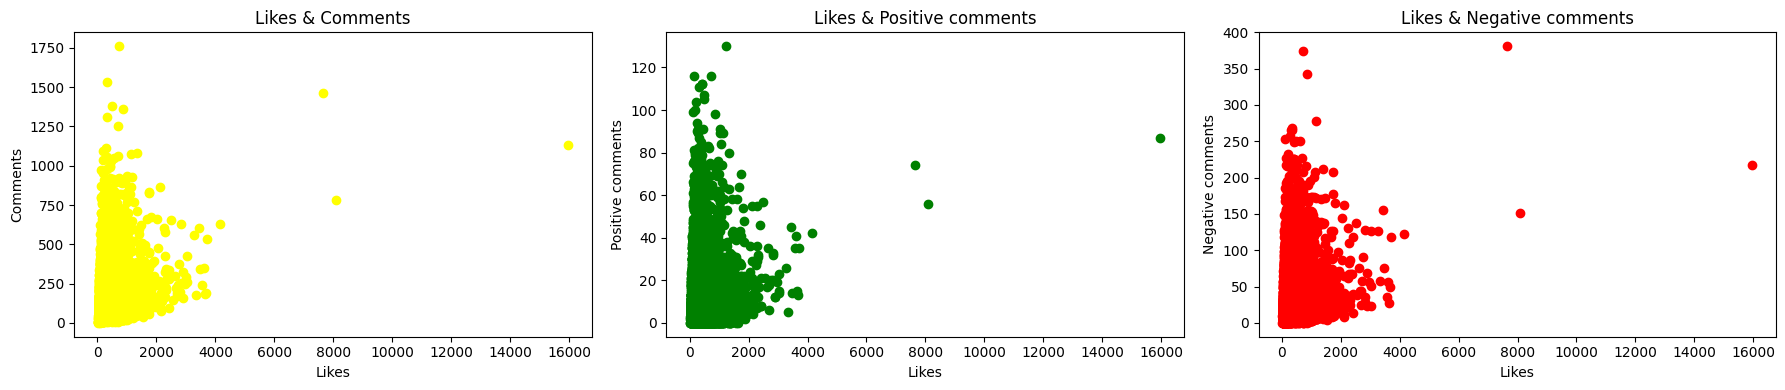

In [ ]:
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.scatter(df_vk_new['likes'], df_vk_new['comments'], color='yellow')
plt.title('Likes & Comments')
plt.xlabel('Likes')
plt.ylabel('Comments')

plt.subplot(1, 3, 2)
plt.scatter(df_vk_new['likes'], df_vk_new['positive'], color='green')
plt.title('Likes & Positive comments')
plt.xlabel('Likes')
plt.ylabel('Positive comments')

plt.subplot(1, 3, 3)
plt.scatter(df_vk_new['likes'], df_vk_new['negative'], color='red')
plt.title('Likes & Negative comments')
plt.xlabel('Likes')
plt.ylabel('Negative comments')

plt.tight_layout()

plt.show()

Наверное нельзя сказать, что существует какая-то зависимость между количеством лайков и количеством комментариев. При этом особенно слабая эта связь для негативных комментариев, а для позитивных комментариев, напротив, можно разглядеть положительную зависимость между количеством лайков и количеством комментариев этого типа.

__[0.6 балла] Задание 13:__  Давайте построим по сентимент-окрасу комментариев топ позитивных новостей.

- Если под новостью оставлено 100 комментариев, из которых 80 позитивные, мы можем быть уверены в том, что новость была хорошо воспринята людьми.
- Если под новостью всего один комментарий и он оказался позитивным, то у нас 100% позитивных комментариев, но это вовсе не означает, что новость была воспринята хорошо.

Получается, что сортировать по доле позитивных комментариев нельзя. Давайте поступим умнее. Доля позитивных комментариев под постом -- это случайная величина. Её довольно часто моделируют с помощью бета-распределения. Если это случайная величина, мы можем построить для неё предиктивный интервал. Пусть $u$ - число позитивных комментариев, а $d$ - нейтральных и негативных.  Пусть

$$
a = 1 + u \qquad b = 1 + d.
$$

Тогда нижняя граница $95\%$ предиктивного интервала для доли будет вычисляться по такой формуле:

$$
\frac{a}{a + b} - 1.65 \cdot \sqrt{\frac{a \cdot b}{(a + b)^2 \cdot (a + b + 1)}}
$$

Если под новостью был всего один комментарий, у такой случайной величины будет высокая дисперсия. Это означаeт, что штука, которую мы вычитаем из доли, окажется высокой. Левая граница интервала окажется маленькой и мы не поднимем комментарий в нашем топе наверх. Фактически мы делаем сортировку по квантилю уровня $0.05$ вместо среднего.

От вас требуется вбить эту формулу, сделать сортировку и вывести на экран топ позитивных новостей. Подробнее про то, откуда берётся эта формула можно почитать [в этой книге.](https://disk.yandex.ru/i/Ctd08bTwC9eI3g) Ищите 4 главу, страницу 140.

In [ ]:
alpha = 1 + df_vk_new['positive']
beta = 1 + df_vk_new['neutral'] + df_vk_new['negative']

df_vk_new['interval_lower'] = alpha / (alpha + beta) - 1.65 * np.sqrt(alpha * beta / ((alpha + beta)**2 * (alpha + beta + 1)))

news_sort = df_vk_new.sort_values('interval_lower', ascending = False)
news_sort.head()

,id,href,datetime,title,likes,comments,snippet,title_clean,snippet_clean,target_tags,negative,neutral,positive,interval_lower
14189,19965364,/science/20180311/1516126324.html,2018-03-11 20:27:37,"Телескоп ""Хаббл"" сфотографировал сталкивающиес...",369,107,NaN,телескоп хаббл сфотографировал сталкивающиеся ...,#UNKN,[0],3.0,32.0,70.0,0.588533
9521,21544373,https://rsport.ria.ru/russia2018_ourteam/20180...,2018-07-08 16:13:28,Болельщики сборной России подарили Акинфееву б...,921,124,#ЧМ2018,болельщики сборной россии подарили акинфееву б...,чм2018,[0],10.0,39.0,69.0,0.509382
14188,19965584,/culture/20180311/1516125774.html,2018-03-11 20:57:56,Юлия Самойлова представит Россию на Евровидени...,418,203,NaN,юлия самойлова представит россию на евровидени...,#UNKN,[0],8.0,80.0,112.0,0.501912
10545,21216757,/tourism/20180611/1522532289.html,2018-06-11 19:01:32,Один из самых больших айсбергов на планете мож...,328,63,"Ученые NASA сообщили, что крупнейший айсберг, ...",один из самых больших айсбергов на планете мож...,ученые nasa сообщили что крупнейший айсберг ко...,[0],2.0,23.0,36.0,0.485761
9895,21423423,http://ria.ru/society/20180629/1523631104.html,2018-06-29 13:48:42,Обратившаяся к Путину украинка встретилась с с...,405,156,NaN,обратившаяся к путину украинка встретилась с с...,#UNKN,[0],15.0,58.0,79.0,0.453265


Построили? Срочно пришлите свою любимую позитивную  новость в общий чат!!!

Топ негативных новостей строить не будем. Вокруг итак слишком много негатива 😻😻😻

__[0.6 балла] Задание 14:__ Какие категории новостей оказались самыми позитивными? Придумайте способ найти такие категории и опишите его тут.

__Ответ:__ Самые позитивные категории: различные географические места (города, океаны, страны), известные личности, lada?, интерактивные проекты. В коде описал ход мыслей

In [ ]:
df_oob_for_positive = news_sort[news_sort.href.isin(test_hrefs)]
df_ria_oob_new = df_ria[df_ria.href.isin(test_hrefs)][['href', 'tags']]
df_oob_for_positive = df_oob_for_positive.set_index('href').join(df_ria_oob_new.set_index('href')).reset_index()
df_oob_for_positive

,href,id,datetime,title,likes,comments,snippet,title_clean,snippet_clean,target_tags,negative,neutral,positive,interval_lower,tags
0,/20181220/1548086735.html,23492479,2018-12-20 20:00:05,"AR-проект ""Кто твой Дед Мороз?""",32,7,"""Кто твой Дед Мороз?"" - история в дополненной ...",arпроект кто твой дед мороз,кто твой дед мороз история в дополненной реал...,[0],1.0,2.0,3.0,0.225000,"интерактивные проекты,внутренний лонгрид,новый..."
1,/20181226/1548764202.html,23557103,2018-12-26 18:55:52,Пожилой француз отправился в путешествие через...,130,66,Француз Жан-Жак Савен начал свое путешествие в...,пожилой француз отправился в путешествие через...,француз жанжак савен начал свое путешествие в ...,[0],8.0,38.0,18.0,0.196609,"атлантический океан,франция,в мире"
2,/20181214/1548023961.html,23424551,2018-12-15 00:04:21,"Архиепископ УПЦ назвал ""объединительный собор""...",164,52,NaN,архиепископ упц назвал объединительный собор с...,#UNKN,[0],7.0,28.0,14.0,0.189860,"религия и мировоззрение,ситуация вокруг упц,ва..."
3,/20181224/1548533049.html,23527352,2018-12-24 01:53:54,Шнуров и Собчак устроили перепалку в соцсетях,105,77,"Шнуров опубликовал в своем Instagram стих, в к...",шнуров и собчак устроили перепалку в соцсетях,шнуров опубликовал в своем instagram стих в ко...,[0],1.0,54.0,19.0,0.180357,"шнур (сергей шнуров),ксения собчак,общество"
4,/20181210/1547765148.html,23373128,2018-12-10 17:09:21,LADA стала вторым автомобильным брендом в мире...,269,223,NaN,lada стала вторым автомобильным брендом в мире...,#UNKN,[0],38.0,128.0,46.0,0.173040,"lada,авто,россия"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,/20181219/1548201219.html,23478972,2018-12-19 20:05:00,"""Фройляйн Иванова"": русская танцовщица — о съе...",42,11,"В мистическом триллере ""Суспирия"", который сей...",фройляйн иванова русская танцовщица о съемках...,в мистическом триллере суспирия который сейчас...,[0],2.0,9.0,0.0,-0.040585,"тильда суинтон,культура"
1129,/20181222/1548483735.html,23512149,2018-12-22 14:53:09,Имена погибших в ДРК российских пилотов назову...,50,10,NaN,имена погибших в дрк российских пилотов назову...,#UNKN,[0],2.0,8.0,0.0,-0.043148,"крушение пассажирского самолета в дрк,в мире"
1130,/20181226/1548001199.html,23553084,2018-12-26 12:00:15,Найдите ингредиенты для салата как можно скорее,29,8,Создайте себе праздничное настроение — пройдит...,найдите ингредиенты для салата как можно скорее,создайте себе праздничное настроение пройдите...,[0],4.0,4.0,0.0,-0.049248,"инфографика,инфографика"
1131,/20181217/1547762856.html,23450475,2018-12-17 13:00:12,Собери новогодний пазл,41,8,Создай своего новогоднего персонажа и поделись...,собери новогодний пазл,создай своего новогоднего персонажа и поделись...,[0],0.0,8.0,0.0,-0.049248,"инфографика,инфографика"


In [ ]:
# Разбиваем текст тегов на список со словами
df_oob_for_positive['tags_words'] = df_oob_for_positive['tags'].apply(lambda x: x.split(','))

# Для каждого уникального слова в списке ячейки создаём новые строки, в которых повторяется информация для разных слов из одного списка
df_oob_for_positive_tags = df_oob_for_positive.explode('tags_words')

# Группируем табличку по одинаковым словам и ищем для каждого из них значение q3 'interval_lower'
tags_sentiment_mean = df_oob_for_positive_tags.groupby('tags_words')['interval_lower'].quantile(0.75)

# Сортируем по полученному значению
tags_sentiment_mean_sort = tags_sentiment_mean.sort_values(ascending=False)
tags_sentiment_mean_sort.head(15)

tags_words
интерактивные проекты                          0.225000
атлантический океан                            0.196609
дед мороз                                      0.174694
lada                                           0.173040
новая зеландия                                 0.157934
истра                                          0.157925
карелия                                        0.157925
суздаль                                        0.157925
осташков                                       0.157925
великий устюг                                  0.157925
варфоломей i (патриарх константинопольский)    0.154418
грымчак юрий                                   0.151821
вмс великобритании                             0.151821
ксения собчак                                  0.149223
газированная вода                              0.136799
Name: interval_lower, dtype: float64

__[0.2 балла] Бонусное задание 3:__ Проанализируйте, как температура комментария (вероятность того, что он негативный) зависит от длины трэда (число комментариев под новостью)? Значима ли эта взаимосвязь? Если вам для проверки этого хочется построить линейную регрессию, не сдерживайтесь.

In [ ]:
# your code here
# ヾ(๑╹◡╹)ﾉ